In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [6]:
# import the data
jobs = pd.read_csv('../data/ch5_employment.csv')

# Print first five lines of your DataFrame
print(jobs.head())

# Check the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())


    datestamp  Agriculture  Business services  Construction  \
0  2000-01-01         10.3                5.7           9.7   
1  2000-02-01         11.5                5.2          10.6   
2  2000-03-01         10.4                5.4           8.7   
3  2000-04-01          8.9                4.5           5.8   
4  2000-05-01          5.1                4.7           5.0   

   Durable goods manufacturing  Education and Health  Finance  Government  \
0                          3.2                   2.3      2.7         2.1   
1                          2.9                   2.2      2.8         2.0   
2                          2.8                   2.5      2.6         1.5   
3                          3.4                   2.1      2.3         1.3   
4                          3.4                   2.7      2.2         1.9   

   Information  Leisure and hospitality  Manufacturing  Mining and Extraction  \
0          3.4                      7.5            3.6                    3.9

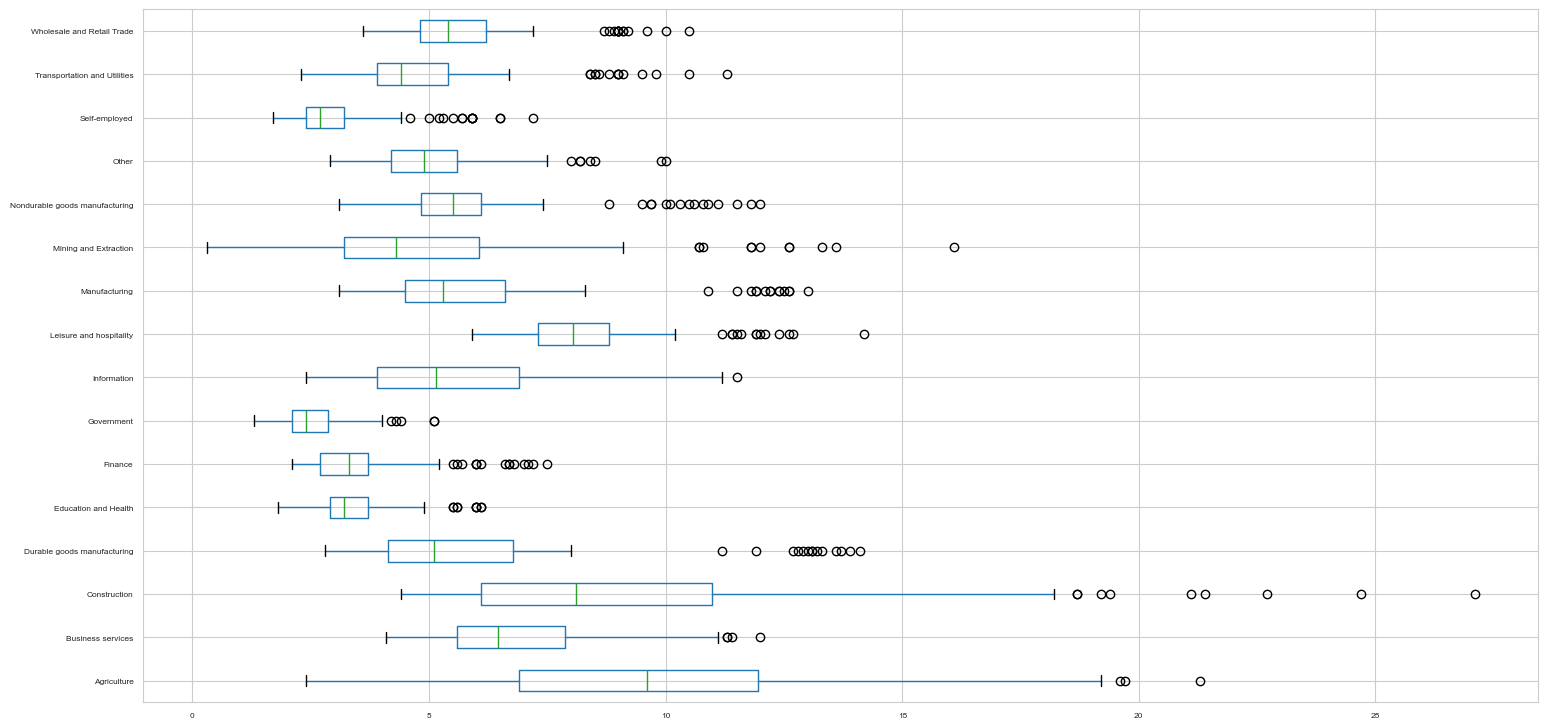

In [8]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False, figsize=(18,9))
plt.show()

In [9]:
# Generate numerical summaries
print(jobs.describe())

       Agriculture  Business services  Construction  \
count   122.000000         122.000000    122.000000   
mean      9.840984           6.919672      9.426230   
std       3.962067           1.862534      4.587619   
min       2.400000           4.100000      4.400000   
25%       6.900000           5.600000      6.100000   
50%       9.600000           6.450000      8.100000   
75%      11.950000           7.875000     10.975000   
max      21.300000          12.000000     27.100000   

       Durable goods manufacturing  Education and Health     Finance  \
count                   122.000000            122.000000  122.000000   
mean                      6.025410              3.420492    3.540164   
std                       2.854475              0.877538    1.235405   
min                       2.800000              1.800000    2.100000   
25%                       4.125000              2.900000    2.700000   
50%                       5.100000              3.200000    3.300000   


In [ ]:
# Print the name of the time series with the highest mean
print('Agriculture')

# Print the name of the time series with the highest variability
print('Construction')

            Finance  Information  Manufacturing  Construction
datestamp                                                    
2000-01-01      2.7          3.4            3.6           9.7
2000-02-01      2.8          2.9            3.4          10.6
2000-03-01      2.6          3.6            3.6           8.7
2000-04-01      2.3          2.4            3.7           5.8
2000-05-01      2.2          3.5            3.4           5.0


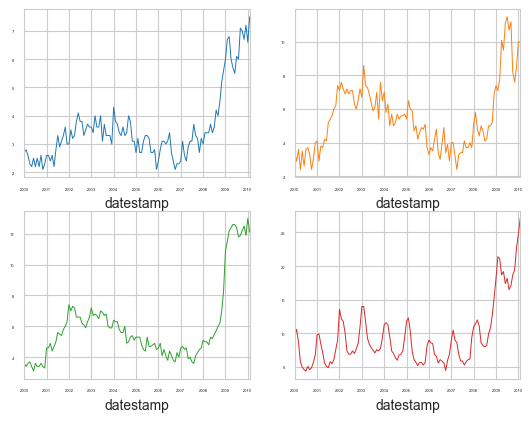

In [11]:
# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]
# Print the first 5 rows of jobs_subset
print(jobs_subset.head())

# Create a facetted graph with 2 rows and 2 columns
# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2,2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=False)

plt.show()

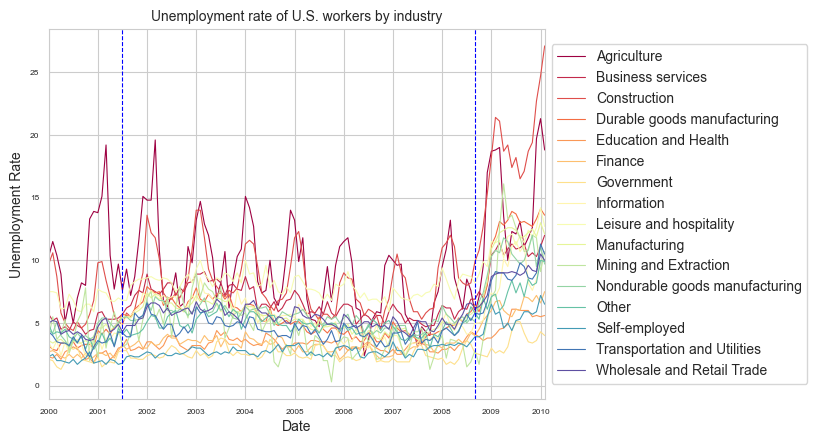

In [12]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8)

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show()

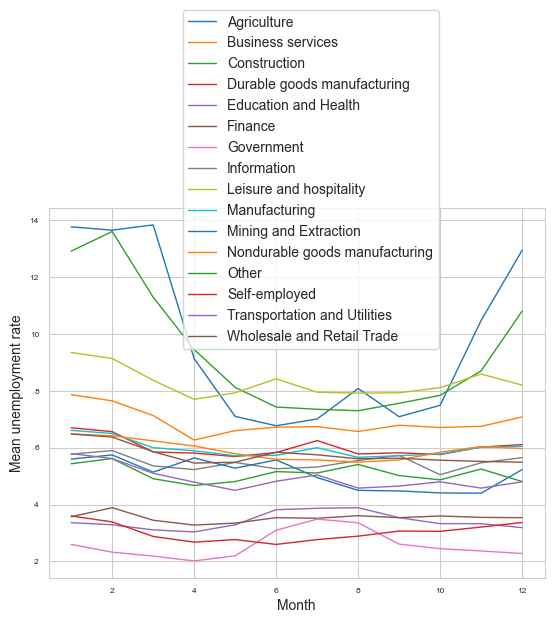

In [14]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show()

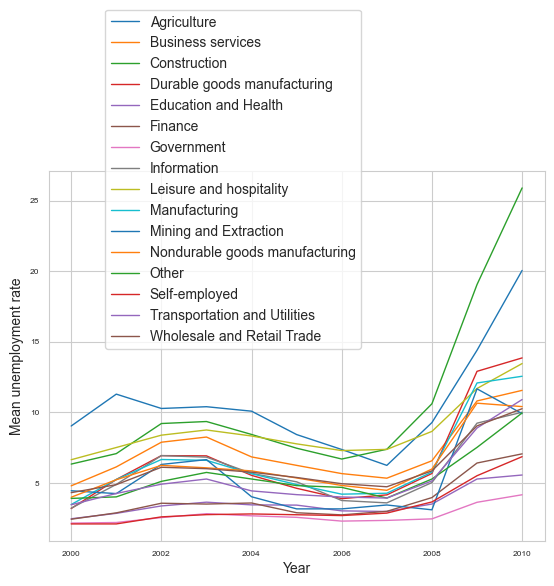

In [15]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)
plt.show()

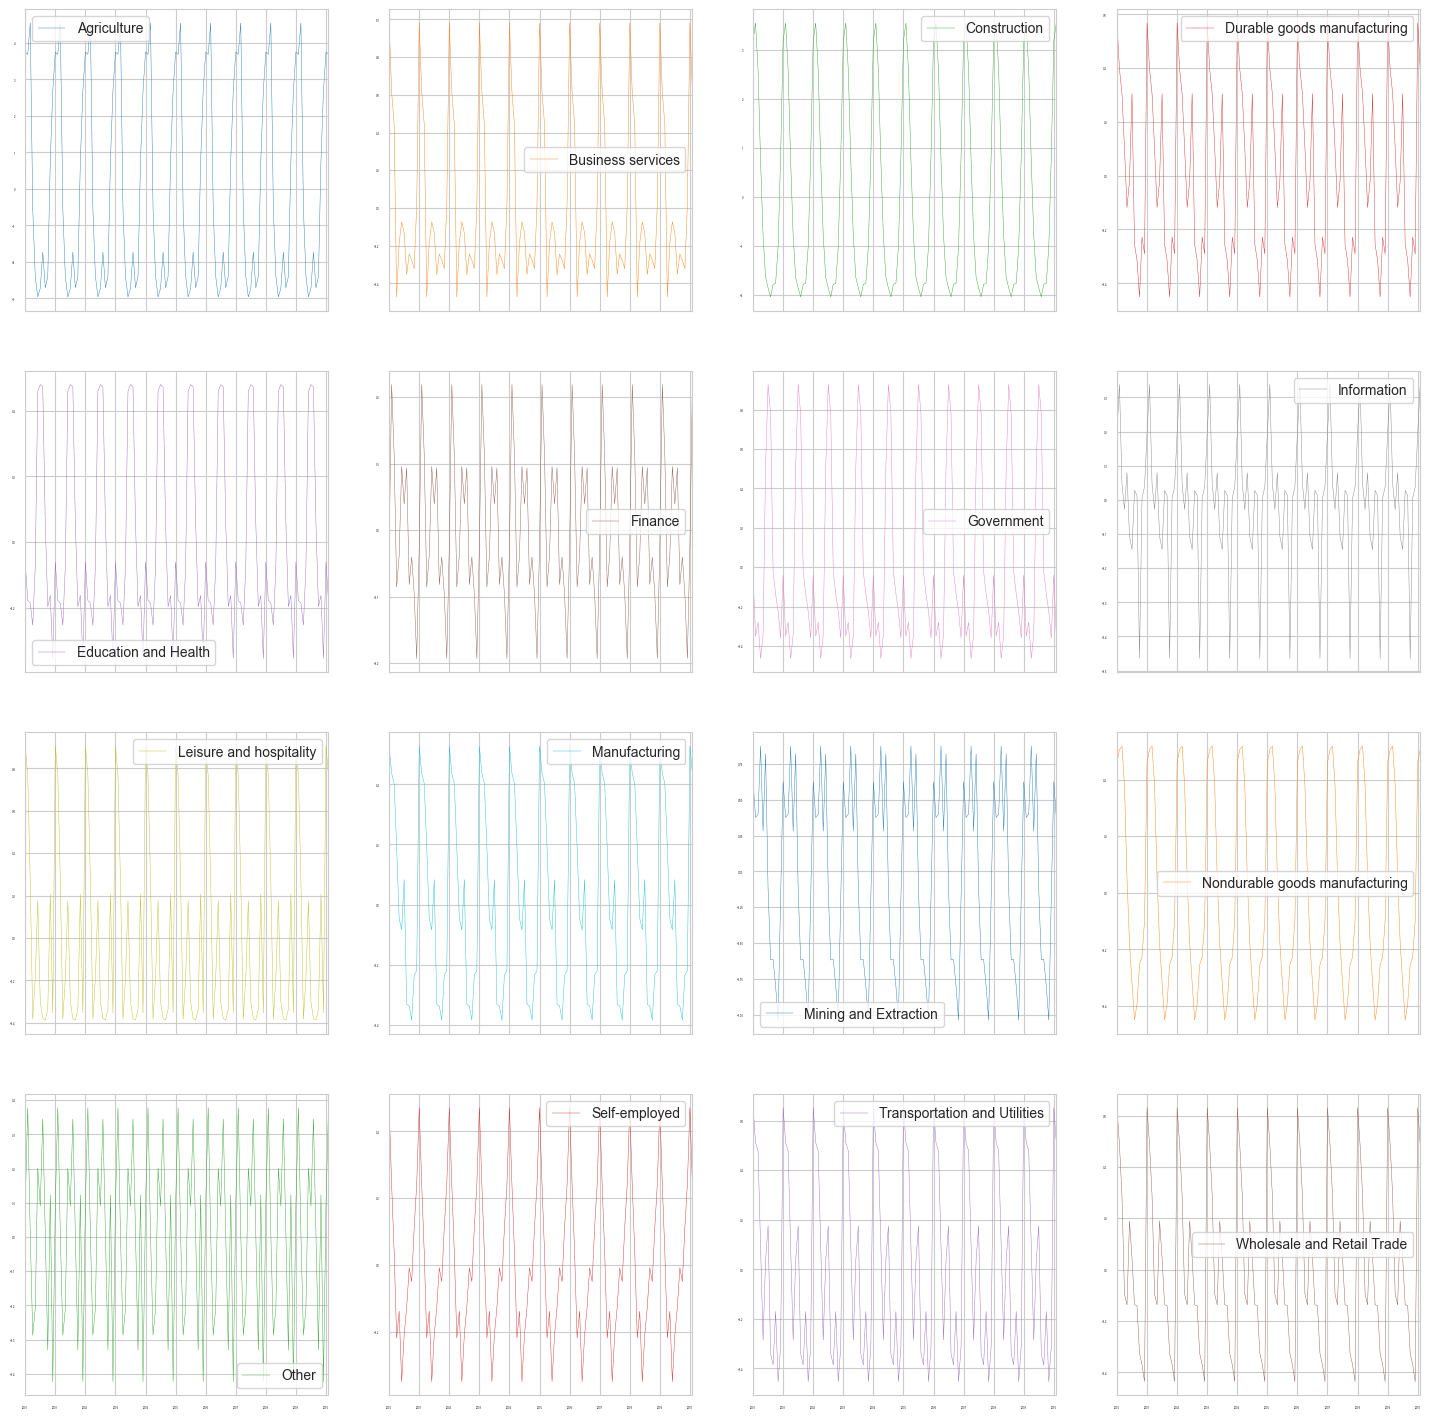

In [23]:
# Initialize dictionary
jobs_decomp = {}
jobs_seasonal = {}
jobs_trend = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition
    
# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal   
    jobs_trend[ts] = jobs_decomp[ts].trend 
    
# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)
trend_df = pd.DataFrame.from_dict(jobs_trend)

# Remove the label for the index
seasonality_df.index.name = None
trend_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4,4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=True, figsize=(18,18))

# Show plot
plt.show()

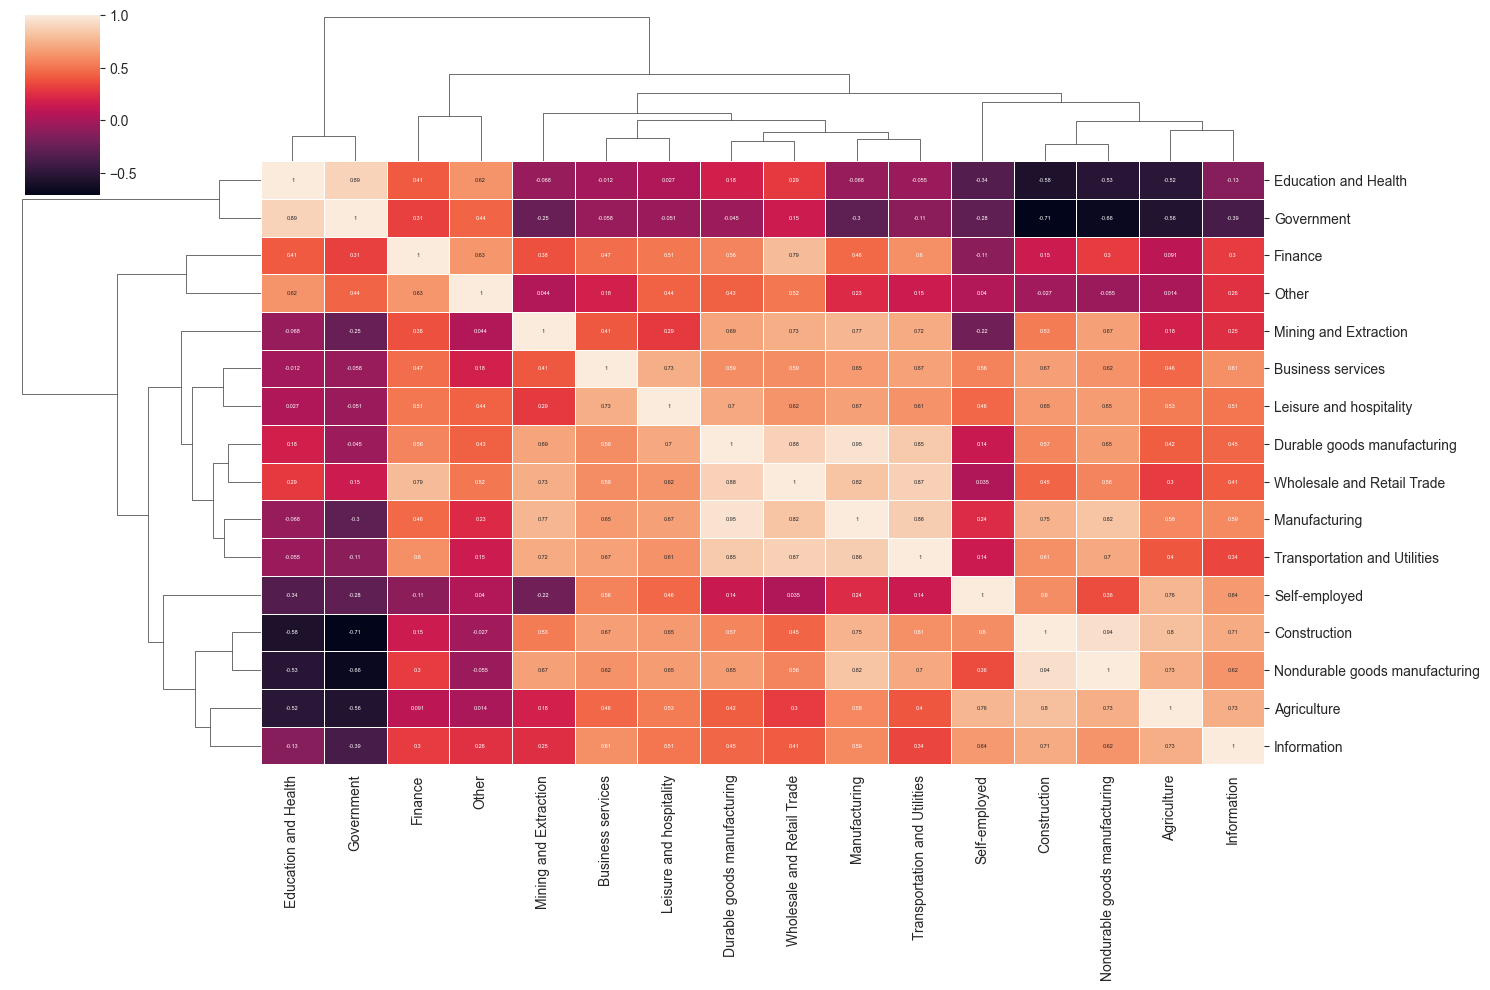

In [25]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()